In [3]:
import os
import pandas as pd
import lightgbm as lgb
import matplotlib.pyplot as plt

In [4]:
data = [
    {
        "rows": 100,
        "RunInferenceWDynamicSQL": {"query_time": 0.003219271, "infer_time": 0.042354488},
        "RunInferenceWIRISSQL": {"query_time": 0.001749706, "infer_time": 0.043090796},
        "RunInferenceWGLobals": {"query_time": 0.001184559, "infer_time": 0.043616056}
    },
    {
        "rows": 1000,
        "RunInferenceWDynamicSQL": {"query_time": 0.031865168, "infer_time": 0.052698898},
        "RunInferenceWIRISSQL": {"query_time": 0.019246697, "infer_time": 0.056159472},
        "RunInferenceWGLobals": {"query_time": 0.00506134, "infer_time": 0.045210719}
    },
    {
        "rows": 10000,
        "RunInferenceWDynamicSQL": {"query_time": 0.237553477, "infer_time": 0.082497978},
        "RunInferenceWIRISSQL": {"query_time": 0.099582171, "infer_time": 0.068728352},
        "RunInferenceWGLobals": {"query_time": 0.036206818, "infer_time": 0.061128354}
    },
    {
        "rows": 100000,
        "RunInferenceWDynamicSQL": {"query_time": 5.279174852, "infer_time": 0.189197206},
        "RunInferenceWIRISSQL": {"query_time": 1.122253346, "infer_time": 0.177564192},
        "RunInferenceWGLobals": {"query_time": 0.535172153, "infer_time": 0.175085044}
    },
    {
        "rows": 500000,
        "RunInferenceWDynamicSQL": {"query_time": 68.741133046, "infer_time": 0.639807224},
        "RunInferenceWIRISSQL": {"query_time": 7.015313649, "infer_time": 0.610818386},
        "RunInferenceWGLobals": {"query_time": 2.743980526, "infer_time": 0.58764743804}
    },
    {
        "rows": 1000000,
        "RunInferenceWDynamicSQL": {"query_time": 196.8711731, "infer_time": 1.145034313},
        "RunInferenceWIRISSQL": {"query_time": 22.13861322, "infer_time": 1.136569023},
        "RunInferenceWGLobals": {"query_time": 5.987578392, "infer_time": 1.106307745}
    },
    {
        "rows": 2000000,
        "RunInferenceWDynamicSQL": {"query_time": 711.3196804, "infer_time": 3.021180152},
        "RunInferenceWIRISSQL": {"query_time": 60.14297461, "infer_time": 2.879153728},
        "RunInferenceWGLobals": {"query_time": 11.92040014, "infer_time": 2.728573560}
    }
]

df = pd.json_normalize(data, sep=".")
display(df)


,rows,RunInferenceWDynamicSQL.query_time,RunInferenceWDynamicSQL.infer_time,RunInferenceWIRISSQL.query_time,RunInferenceWIRISSQL.infer_time,RunInferenceWGLobals.query_time,RunInferenceWGLobals.infer_time
0,100,0.003219,0.042354,0.001750,0.043091,0.001185,0.043616
1,1000,0.031865,0.052699,0.019247,0.056159,0.005061,0.045211
2,10000,0.237553,0.082498,0.099582,0.068728,0.036207,0.061128
3,100000,5.279175,0.189197,1.122253,0.177564,0.535172,0.175085
4,500000,68.741133,0.639807,7.015314,0.610818,2.743981,0.587647
5,1000000,196.871173,1.145034,22.138613,1.136569,5.987578,1.106308
6,2000000,711.319680,3.021180,60.142975,2.879154,11.920400,2.728574


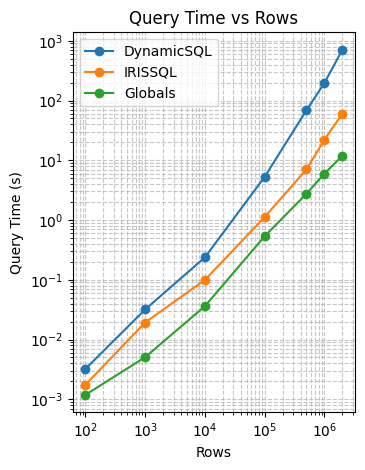

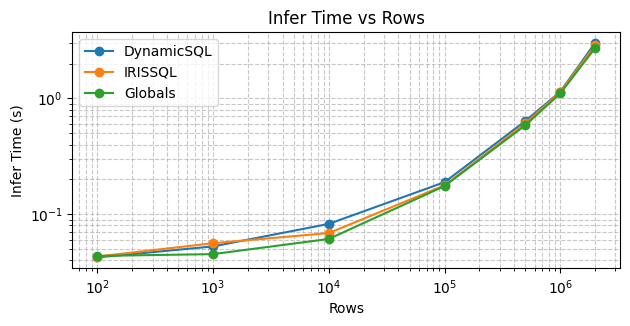

In [5]:
# --- Plot 1: Query Time ---
plt.figure()
plt.plot(df["rows"], df["RunInferenceWDynamicSQL.query_time"], marker="o", label="DynamicSQL")
plt.plot(df["rows"], df["RunInferenceWIRISSQL.query_time"], marker="o", label="IRISSQL")
plt.plot(df["rows"], df["RunInferenceWGLobals.query_time"], marker="o", label="Globals")
plt.xlabel("Rows")
plt.ylabel("Query Time (s)")
plt.title("Query Time vs Rows")
plt.xticks(df["rows"])
plt.xscale("log")
plt.yscale("log")
plt.grid(True, which="both", linestyle="--", alpha=0.7)
plt.legend()
plt.tight_layout()
plt.gca().set_aspect("equal", adjustable="box")
plt.show()

# --- Plot 2: Infer Time ---
plt.figure()
plt.plot(df["rows"], df["RunInferenceWDynamicSQL.infer_time"], marker="o", label="DynamicSQL")
plt.plot(df["rows"], df["RunInferenceWIRISSQL.infer_time"], marker="o", label="IRISSQL")
plt.plot(df["rows"], df["RunInferenceWGLobals.infer_time"], marker="o", label="Globals")
plt.xlabel("Rows")
plt.ylabel("Infer Time (s)")
plt.title("Infer Time vs Rows")
plt.xticks(df["rows"])
plt.xscale("log")
plt.yscale("log")
plt.grid(True, which="both", linestyle="--", alpha=0.7)
plt.legend()
plt.tight_layout()
plt.gca().set_aspect("equal", adjustable="box")

plt.show()

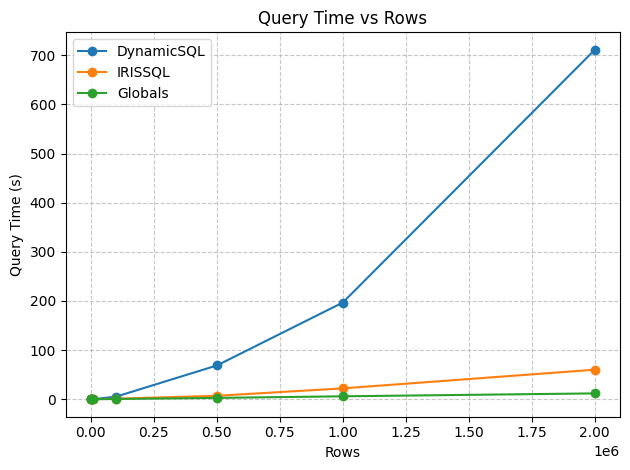

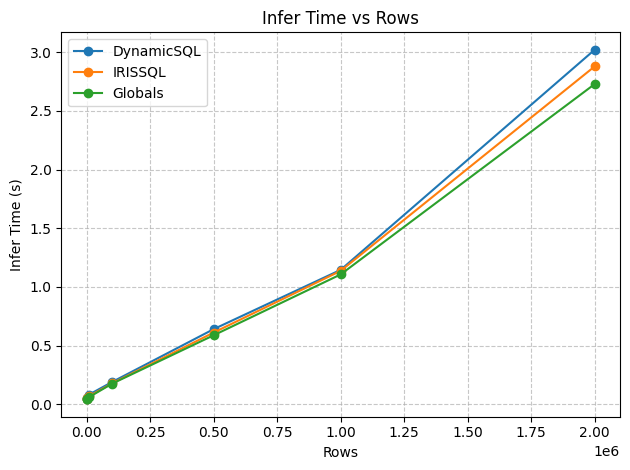

In [6]:
# --- Plot 1: Query Time ---
plt.figure()
plt.plot(df["rows"], df["RunInferenceWDynamicSQL.query_time"], marker="o", label="DynamicSQL")
plt.plot(df["rows"], df["RunInferenceWIRISSQL.query_time"], marker="o", label="IRISSQL")
plt.plot(df["rows"], df["RunInferenceWGLobals.query_time"], marker="o", label="Globals")
plt.xlabel("Rows")
plt.ylabel("Query Time (s)")
plt.title("Query Time vs Rows")
# plt.xticks(df["rows"])
# plt.xscale("log")
# plt.yscale("log")
plt.grid(True, which="both", linestyle="--", alpha=0.7)
plt.legend()
plt.tight_layout()
# plt.gca().set_aspect("equal", adjustable="box")
plt.show()

# --- Plot 2: Infer Time ---
plt.figure()
plt.plot(df["rows"], df["RunInferenceWDynamicSQL.infer_time"], marker="o", label="DynamicSQL")
plt.plot(df["rows"], df["RunInferenceWIRISSQL.infer_time"], marker="o", label="IRISSQL")
plt.plot(df["rows"], df["RunInferenceWGLobals.infer_time"], marker="o", label="Globals")
plt.xlabel("Rows")
plt.ylabel("Infer Time (s)")
plt.title("Infer Time vs Rows")
# plt.xticks(df["rows"])
# plt.xscale("log")
# plt.yscale("log")
plt.grid(True, which="both", linestyle="--", alpha=0.7)
plt.legend()
plt.tight_layout()
# plt.gca().set_aspect("equal", adjustable="box")

plt.show()

## Exponential Regression Analysis

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

print("Fit for Infer Time vs Rows")
print("equation: y = a * x^k + c")
print("parameters: a, k, c, where: ")
print("\ta: scaling factor")
print("\tk: power law exponent")
print("\tc: vertical offset")

def power_law(x, a, k, c):
    return a * np.power(x, k) + c

# Prepare data
weights = {}
x_data = df["rows"].values
columns = df.columns[1:]
for col in columns:
    print(col)
    y_data = df[col].values

    y_min = np.min(y_data)
    y_max = np.max(y_data)
    x_max = np.max(x_data)

    initial_guess = [y_max - y_min, 1/x_max, y_min]
    popt, pcov = curve_fit(power_law, x_data, y_data, p0=initial_guess)

    weights[col] = popt

    a_fit, k_fit, c_fit = popt
    print(f"\tFit results: a={a_fit*1e6:.5f}e-6, k={k_fit:.2f}, c={c_fit:.2f}")






Fit for Infer Time vs Rows
equation: y = a * x^k + c
parameters: a, k, c, where: 
	a: scaling factor
	k: power law exponent
	c: vertical offset
RunInferenceWDynamicSQL.query_time
	Fit results: a=0.00241e-6, k=1.82, c=1.90
RunInferenceWDynamicSQL.infer_time
	Fit results: a=0.00996e-6, k=1.34, c=0.09
RunInferenceWIRISSQL.query_time
	Fit results: a=0.02909e-6, k=1.48, c=0.04
RunInferenceWIRISSQL.infer_time
	Fit results: a=0.01751e-6, k=1.30, c=0.08
RunInferenceWGLobals.query_time
	Fit results: a=4.12700e-6, k=1.03, c=-0.02
RunInferenceWGLobals.infer_time
	Fit results: a=0.02749e-6, k=1.27, c=0.07


In [72]:
numrows = 100e6
a=0.01832e-6
k=1.30
c=0.08
(a * numrows**k + c) ,(a * numrows**k + c) / 60

(460.25759425255546, 7.6709599042092576)

In [70]:
a*k*numrows**(k-1)

5.982308725283222e-06

In [73]:
460.25759425255546/numrows

4.602575942525554e-06